In [1]:
import numpy as np
import random #not good practice
import matplotlib.pyplot as plt
import math 
import statistics
from scipy import stats
import seaborn as sns

# 2D Gaussian Metropolis Hasting

In [32]:
def Gaussian_Metropolis_Hasting(number_of_trials,mu,sigma):
    
    accepted=[0,0]
    states = [] # the states of the MH
    
    current=[0,0]
    current[0] = random.uniform(-sigma[0]+mu[0],sigma[0]+mu[0])#choose a random number (central) to begin
    current[1] = random.uniform(-sigma[1]+mu[1],sigma[1]+mu[1])#choose a random number (central) to begin
   
    acceptance_rate_tally = [1,1] #random values to start with
    
    for i in range(1,number_of_trials+1):#repeat per number of trials
        states.append(current) # add the current value to list of MH values
        
        predicted=[0,0]
        predicted[0] = random.uniform(current[0]-acceptance_rate_tally[0],current[0]+acceptance_rate_tally[0]) # predict a value, based off how close the running acceptance rate is to ideal 25-27%
        predicted[1] = random.uniform(current[1]-acceptance_rate_tally[1],current[1]+acceptance_rate_tally[1]) # predict a value, based off how close the running acceptance rate is to ideal 25-27%

        probability_of_current=[0,0]
        probability_of_current[0] = (np.exp((-(current[0]-mu[0])**2)/(2*sigma[0]**2))) / (sigma[0] * np.sqrt(2*np.pi)) #probability of current value given known distributuin
        probability_of_current[1] = (np.exp((-(current[1]-mu[1])**2)/(2*sigma[1]**2))) / (sigma[1] * np.sqrt(2*np.pi)) #probability of current value given known distributuin

        probability_of_predicted=[0,0]
        probability_of_predicted[0] = (np.exp((-(predicted[0]-mu[0])**2)/(2*sigma[0]**2))) / (sigma[0] * np.sqrt(2*np.pi)) #probability of predicted value given known distributuin
        probability_of_predicted[1] = (np.exp((-(predicted[1]-mu[1])**2)/(2*sigma[1]**2))) / (sigma[1] * np.sqrt(2*np.pi)) #probability of predicted value given known distributuin

        total_probability_current= probability_of_current[0] * probability_of_current[1]
        total_probability_predicted= probability_of_predicted[0] * probability_of_predicted[1]
        
        acceptance = min(total_probability_predicted/total_probability_current,1) # if the proability of predicted is grater than current given the known distribution
        
        if random.uniform(0,1)<acceptance: #if the probability of the predicted value is greater than a random float accept it. if not... do nothing
            current = predicted #set the current value to the predicted one
            accepted[0]=accepted[0]+1
            accepted[1]=accepted[1]+1
            
        if accepted[0]/i > 0.27: #if the acceptance rate is too high > 27% 
            acceptance_rate_tally[0] = acceptance_rate_tally[0] - ((accepted[0]/i)-0.25)# make sure it requires a closer number to current next iteration
        if accepted[1]/i > 0.27: #if the acceptance rate is too high > 27% 
            acceptance_rate_tally[1] = acceptance_rate_tally[1] - ((accepted[1]/i)-0.25)# make sure it requires a closer number to current next iteration

        if accepted[0]/i < 0.25: #if the acceptance rate is too high > 27% make sure its decreased next iteration
            acceptance_rate_tally[0] = acceptance_rate_tally[0] + (0.27-(accepted[0]/(i))) # make sure it requires a further number to current next iteration
        if accepted[1]/i < 0.25: #if the acceptance rate is too high > 27% make sure its decreased next iteration
            acceptance_rate_tally[1] = acceptance_rate_tally[1] + (0.27-(accepted[1]/(i))) # make sure it requires a further number to current next iteration
    return states ,accepted;# [burn_in:] # uncomment if having a warm up 20%




### Setting Parameters ###
mu=[10,12]
number_of_trials=1000
sigma=[1,2] #larger sigmas can have a impact on the acceptance rate. 
number_of_stacks=20 # number of recatngles on graph

MH_predictions,accepted =  Gaussian_Metropolis_Hasting(number_of_trials,mu=mu,sigma=sigma) # run the MH prediction: number of iterations, mean and variation. 


In [33]:
MH_predictions

[[9.469917446504908, 12.87824151982039],
 [8.803183300685433, 13.23661705040769],
 [8.671412881390516, 13.440485053788505],
 [8.622972314060451, 13.669221812621178],
 [9.50083382429427, 12.819304752858011],
 [9.50083382429427, 12.819304752858011],
 [9.50083382429427, 12.819304752858011],
 [10.82176066440923, 13.150338968410548],
 [10.82176066440923, 13.150338968410548],
 [10.15890926756764, 13.078784955475506],
 [10.15890926756764, 13.078784955475506],
 [10.15890926756764, 13.078784955475506],
 [10.15890926756764, 13.078784955475506],
 [10.859298838165731, 9.520972951806836],
 [10.859298838165731, 9.520972951806836],
 [9.005442507715923, 12.065373680315373],
 [9.005442507715923, 12.065373680315373],
 [9.005442507715923, 12.065373680315373],
 [9.005442507715923, 12.065373680315373],
 [9.005442507715923, 12.065373680315373],
 [9.005442507715923, 12.065373680315373],
 [9.005442507715923, 12.065373680315373],
 [9.005442507715923, 12.065373680315373],
 [9.005442507715923, 12.065373680315373

In [37]:
#the acceptance rate is based on the values after the warm up period
#to make the acceptance values include that of the warm up period comment out the lines as indicated above
print('Acceptance Rate:', round(accepted[0]*100/number_of_trials,2),'%') #print the acceptance rate - for accuracry purpose only
    

Acceptance Rate: 28.2 %


In [38]:
x=[]
y=[]
for i in range (0,len(MH_predictions)):
    x.append(MH_predictions[i][0])
    y.append(MH_predictions[i][1])

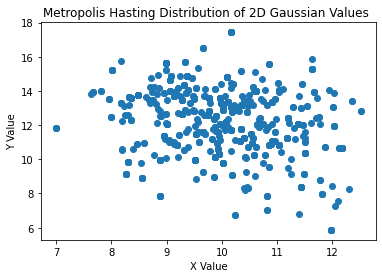

In [39]:

plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Metropolis Hasting Distribution of 2D Gaussian Values ')

plt.scatter(x, y)
plt.show()

## Jarque-Bera Test

In [ ]:
skewness = 

In [ ]:
kurtosis = 

In [ ]:
BS = n[((skewness**2)/6)+(((kurtosis-3)**2)/24)]